## EDA For Var 9-16

In [1]:
## Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
## Constants
file = 'hotel_bookings.csv'

In [3]:
## Load the file
ht = pd.read_csv(file)
mine = ht.iloc[:, 8:16]

In [4]:
## Simple descriptive info/stats
mine.head()

,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,0,2,0.0,0,BB,PRT,Direct,Direct
1,0,2,0.0,0,BB,PRT,Direct,Direct
2,1,1,0.0,0,BB,GBR,Direct,Direct
3,1,1,0.0,0,BB,GBR,Corporate,Corporate
4,2,2,0.0,0,BB,GBR,Online TA,TA/TO


In [5]:
## Checking data types row counts
mine.info()

## Looking like there are some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   stays_in_week_nights  119390 non-null  int64  
 1   adults                119390 non-null  int64  
 2   children              119386 non-null  float64
 3   babies                119390 non-null  int64  
 4   meal                  119390 non-null  object 
 5   country               118902 non-null  object 
 6   market_segment        119390 non-null  object 
 7   distribution_channel  119390 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 7.3+ MB


In [6]:
## Checking how many nan's are there
mine.isnull().sum()

stays_in_week_nights      0
adults                    0
children                  4
babies                    0
meal                      0
country                 488
market_segment            0
distribution_channel      0
dtype: int64

In [35]:
# Calculating proportion of rows with missing values
mine.isnull().sum().sum()/mine.shape[0]

mine2 = mine.dropna() # remove 2 if we decide to drop na

Suggestion 1: drop na values with missing countries and missing children rows, which account for less than half percent of the data

In [8]:
mine2.describe()
## Some of the max values seem very very large. Indicating we might have some outliers.

,stays_in_week_nights,adults,children,babies
count,118898.000000,118898.000000,118898.000000,118898.000000
mean,2.502145,1.858391,0.104207,0.007948
std,1.900168,0.578576,0.399172,0.097380
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000
75%,3.000000,2.000000,0.000000,0.000000
max,41.000000,55.000000,10.000000,10.000000


In [9]:
num = mine2.describe().columns # column names of numerical columns
print(num)

cat = mine2.columns.difference(num) # column names of categorical columns
print(cat)

Index(['stays_in_week_nights', 'adults', 'children', 'babies'], dtype='object')
Index(['country', 'distribution_channel', 'market_segment', 'meal'], dtype='object')


In [44]:
# For each column, checking the unique values

mine.nunique()

stays_in_week_nights     35
adults                   14
children                  5
babies                    5
meal                      5
country                 177
market_segment            8
distribution_channel      5
dtype: int64

<Figure size 640x480 with 0 Axes>

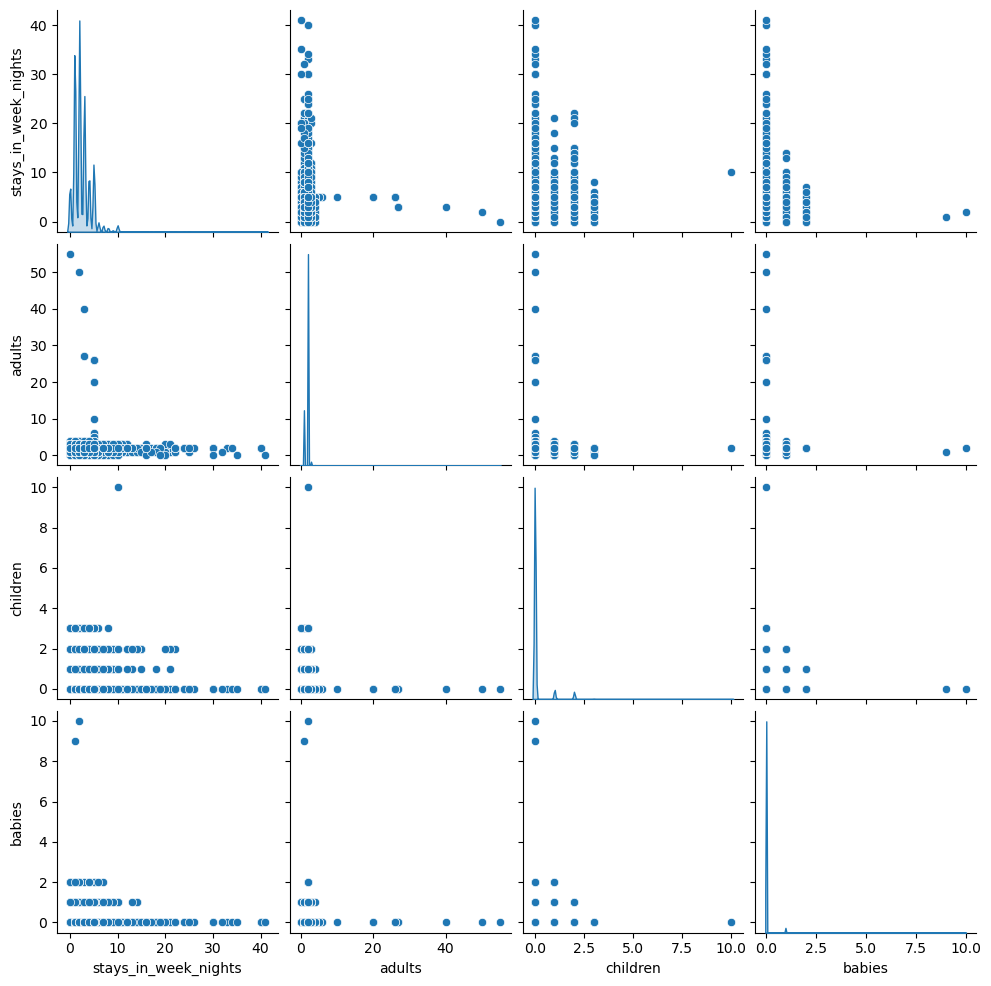

In [36]:
# Take a look at the distribution and correlations
plt.clf()
sns.pairplot(mine2,diag_kind = "kde")
plt.show()

## Seems like all these variables have some outliers

In [37]:
print(mine.quantile(0.95))
print(mine.quantile(0.99))

stays_in_week_nights    5.0
adults                  3.0
children                1.0
babies                  0.0
Name: 0.95, dtype: float64
stays_in_week_nights    10.0
adults                   3.0
children                 2.0
babies                   0.0
Name: 0.99, dtype: float64


The data seems quite right skewed. Could take log of everything or remove the extreme outliers.

In [38]:
# Propose to replace all numerical values with logged version of these values

mine2[num] = np.log(mine2[num]+1)

/var/folders/g0/pb9rj9n56psgj5_0xvdld4940000gn/T/ipykernel_40149/3756461115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mine2[num] = np.log(mine2[num]+1)


In [39]:
mine2

,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,0.000000,1.098612,0.0,0.0,BB,PRT,Direct,Direct
1,0.000000,1.098612,0.0,0.0,BB,PRT,Direct,Direct
2,0.693147,0.693147,0.0,0.0,BB,GBR,Direct,Direct
3,0.693147,0.693147,0.0,0.0,BB,GBR,Corporate,Corporate
4,1.098612,1.098612,0.0,0.0,BB,GBR,Online TA,TA/TO
...,...,...,...,...,...,...,...,...
119385,1.791759,1.098612,0.0,0.0,BB,BEL,Offline TA/TO,TA/TO
119386,1.791759,1.386294,0.0,0.0,BB,FRA,Online TA,TA/TO
119387,1.791759,1.098612,0.0,0.0,BB,DEU,Online TA,TA/TO
119388,1.791759,1.098612,0.0,0.0,BB,GBR,Online TA,TA/TO


<Figure size 640x480 with 0 Axes>

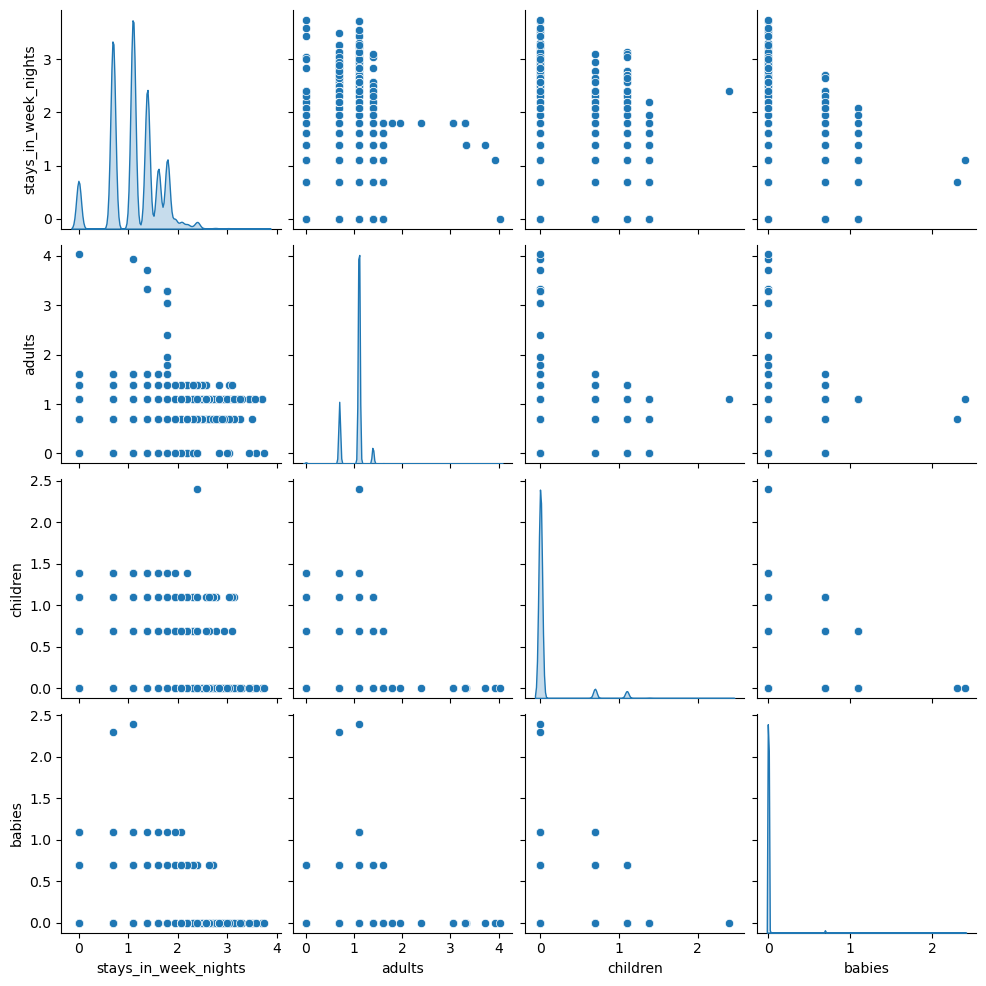

In [43]:
# Look at the histogram again after logging

plt.clf()
sns.pairplot(mine2,diag_kind = "kde")
plt.show()

## Seems like outlier and skew problems are mostly fixed

In [15]:
mine.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [16]:
pd.get_dummies(mine['meal'])

mine

,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,0,2,0.0,0,BB,PRT,Direct,Direct
1,0,2,0.0,0,BB,PRT,Direct,Direct
2,1,1,0.0,0,BB,GBR,Direct,Direct
3,1,1,0.0,0,BB,GBR,Corporate,Corporate
4,2,2,0.0,0,BB,GBR,Online TA,TA/TO
...,...,...,...,...,...,...,...,...
119385,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO
119386,5,3,0.0,0,BB,FRA,Online TA,TA/TO
119387,5,2,0.0,0,BB,DEU,Online TA,TA/TO
119388,5,2,0.0,0,BB,GBR,Online TA,TA/TO


In [17]:
## One-hot encode the categorical columns
mine2dum = pd.get_dummies(mine2[cat])
mine2dum.head(5)

,country_ABW,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [18]:
mine2[num]

,stays_in_week_nights,adults,children,babies
0,0.000000,1.098612,0.0,0.0
1,0.000000,1.098612,0.0,0.0
2,0.693147,0.693147,0.0,0.0
3,0.693147,0.693147,0.0,0.0
4,1.098612,1.098612,0.0,0.0
...,...,...,...,...
119385,1.791759,1.098612,0.0,0.0
119386,1.791759,1.386294,0.0,0.0
119387,1.791759,1.098612,0.0,0.0
119388,1.791759,1.098612,0.0,0.0


In [33]:
# Merge one-hot encoded cat cols with numerical cols
mine3 = mine2[num].join(mine2dum)
mine3

# Save as CSV file
mine3.to_csv("Var9to16.csv", index = False)

In [34]:
# Normalize the numeric data
mine2num = mine2[num]

mine2num_std = (mine2num-mine2num.mean())/mine2num.std()
mine3_std = mine2num_std.join(mine2dum)
mine3_std

# Save as CSV file
mine3_std.to_csv("Var9to16_Std.csv", index = False)

$\hat{\beta}$